In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

from src.eclipses import get_eclipses, plot_eclipse_timings
from utils.set_dir_to_root import set_dir_to_root
from src.noise_filtering import complete_filter

import importlib
import statsmodels.api as sm

In [2]:
sns.set_style('whitegrid')

In [34]:
set_dir_to_root()

with open("data/all_systems.txt") as f:
    all_systems = f.read().split(",")
system_id = all_systems[0]  # Works great on like, 0, dies on like, 8. But everything dies on 8
eclipses = get_eclipses(system_id, "data/combined")

C:\Users\User\AppData\Local\Temp\ipykernel_130496\3327421123.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


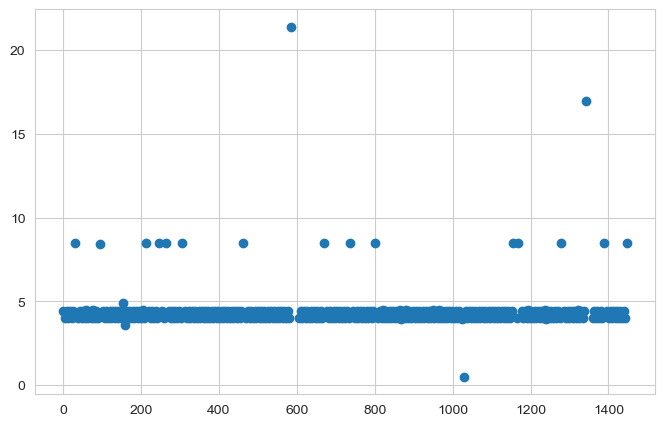

In [35]:
fig1, ax1 = plot_eclipse_timings(eclipses, dims=(8, 5))
fig1.show()

In [99]:
half_filtered = complete_filter(eclipses, "delta")

NameError: name 'complete_filter' is not defined

C:\Users\User\AppData\Local\Temp\ipykernel_130496\1319968528.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


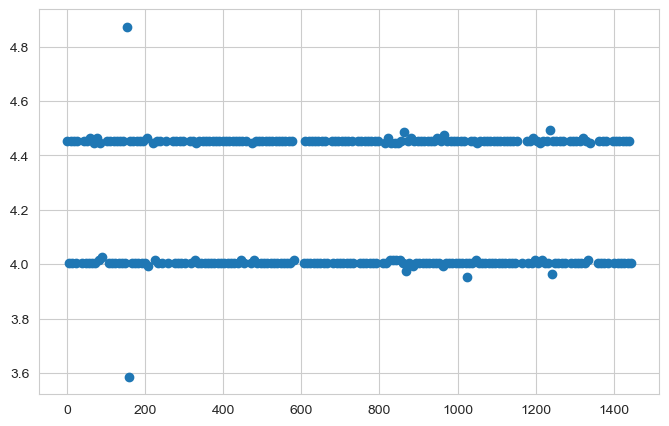

In [37]:
fig1, ax1 = plot_eclipse_timings(half_filtered, dims=(8, 5))
fig1.show()

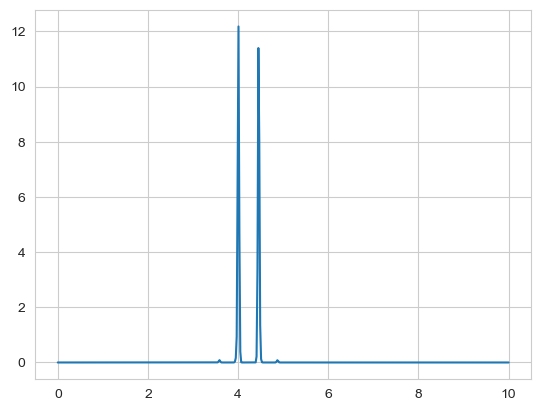

In [50]:
dens = sm.nonparametric.KDEUnivariate(half_filtered["delta"])
dens.fit(adjust=0.2)  # 0.2 or 0.3
x = np.linspace(0,10,500) #restrict range to (0,1)
y = dens.evaluate(x)
plt.plot(x,y)

In [94]:
col = "delta"
binwidth = 0.1  # TODO This number is totally arbitrary, fine tuning required

no_bins = int((eclipses[col].max() - eclipses[col].min()) / binwidth)

no_bins = max(no_bins, 20)
binwidth = (eclipses[col].max() - eclipses[col].min()) / no_bins  # This is the real binwidth

In [95]:
offset_attempts = 21
offsets = np.arange(offset_attempts).T * binwidth / (offset_attempts - 1)
offsets = np.expand_dims(offsets, 1)
offsets

array([[0.        ],
       [0.00501981],
       [0.01003963],
       [0.01505944],
       [0.02007925],
       [0.02509906],
       [0.03011888],
       [0.03513869],
       [0.0401585 ],
       [0.04517831],
       [0.05019813],
       [0.05521794],
       [0.06023775],
       [0.06525756],
       [0.07027738],
       [0.07529719],
       [0.080317  ],
       [0.08533681],
       [0.09035663],
       [0.09537644],
       [0.10039625]])

In [96]:
results = np.zeros((offset_attempts, no_bins + 1))
scores = np.zeros((offset_attempts, 1))

for i, offset in enumerate(np.arange(offset_attempts) * binwidth / (offset_attempts - 1)):
    print(offset)
    counts, edges = np.histogram(eclipses[col], bins=no_bins + 1,
                                 range=(eclipses[col].min() - offset, eclipses[col].max() - offset + binwidth))
    # The +1s that appear here are so that the offset does not lead to eclipses being dropped
    score = np.sum(np.square(counts), axis=0)
    results[i, :] = counts
    scores[i] = score

0.0
0.00501981255136238
0.01003962510272476
0.01505943765408714
0.02007925020544952
0.025099062756811903
0.03011887530817428
0.03513868785953666
0.04015850041089904
0.04517831296226142
0.050198125513623806
0.055217938064986184
0.06023775061634856
0.06525756316771095
0.07027737571907332
0.0752971882704357
0.08031700082179807
0.08533681337316046
0.09035662592452284
0.09537643847588521
0.10039625102724761


In [97]:
results

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [84]:
one_hot = (scores==np.max(scores)).astype(int).T
one_hot

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [92]:
inverted = np.argwhere(one_hot)[:,1]
inverted

array([2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [93]:
inverted[len(inverted)//2]

5